In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('C:\\Users\\dell\\Datasets\\PM_Modi_speeches.csv')

In [41]:
df.head(10)

,date,title,url,lang,words,text
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,https://www.pmindia.gov.in/en/news_updates/pms...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,https://www.pmindia.gov.in/en/news_updates/pms...,en,10128,Our country’s Agriculture Minister Shri Narend...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,https://www.pmindia.gov.in/en/news_updates/pms...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,https://www.pmindia.gov.in/en/news_updates/pms...,en,50260,"My dear countrymen,\nCongratulations and many ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,https://www.pmindia.gov.in/en/news_updates/pms...,en,11908,The process of Structural Reforms going on in ...
5,"Aug 11, 2020",PM’s interaction with CMs to discuss the curre...,https://www.pmindia.gov.in/en/news_updates/pms...,en,6749,Namaskar!\nHolding discussions with all of you...
6,"Aug 10, 2020",PM’s address at the inauguration of Submarine ...,https://www.pmindia.gov.in/en/news_updates/pms...,en,9751,My greetings to the land of freedom struggle f...
7,"Aug 09, 2020",PM’s address at the launch of Financing Facili...,https://www.pmindia.gov.in/en/news_updates/pms...,en,9986,"Today is Hal Shashti, the Birth Anniversary of..."
8,"Aug 08, 2020",PM’s address at inauguration of Rashtriya Swac...,https://www.pmindia.gov.in/en/news_updates/pms...,en,8176,Today is a historic day. This date i.e. 8th A...
9,"Aug 07, 2020",PM’s speech at Higher Education Conclave,https://www.pmindia.gov.in/en/news_updates/pms...,en,13574,Namaskar!\nI extend greetings to my colleagues...


In [42]:
df.shape

(922, 6)

In [43]:
df.size

5532

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    922 non-null    object
 1   title   922 non-null    object
 2   url     922 non-null    object
 3   lang    922 non-null    object
 4   words   922 non-null    int64 
 5   text    922 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.3+ KB


In [45]:
df.isnull().sum()

date     0
title    0
url      0
lang     0
words    0
text     0
dtype: int64

In [46]:
df.describe()

,words
count,922.000000
mean,12374.189805
std,8891.662434
min,753.000000
25%,5560.000000
50%,10660.500000
75%,16476.500000
max,74199.000000


In [47]:
df.drop(["url","lang","words"], axis = 1, inplace = True)
df.head()

,date,title,text
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,"My dear countrymen, Namaskar.\nGenerally, this..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,Our country’s Agriculture Minister Shri Narend...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,"My cabinet colleague, Shri Rajnath ji, Chief o..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,"My dear countrymen,\nCongratulations and many ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,The process of Structural Reforms going on in ...


In [48]:
import nltk
import string
import re

In [49]:
!pip install wordcloud

In [50]:
!pip install stop-words

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
import wordcloud
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from stop_words import get_stop_words

In [53]:
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

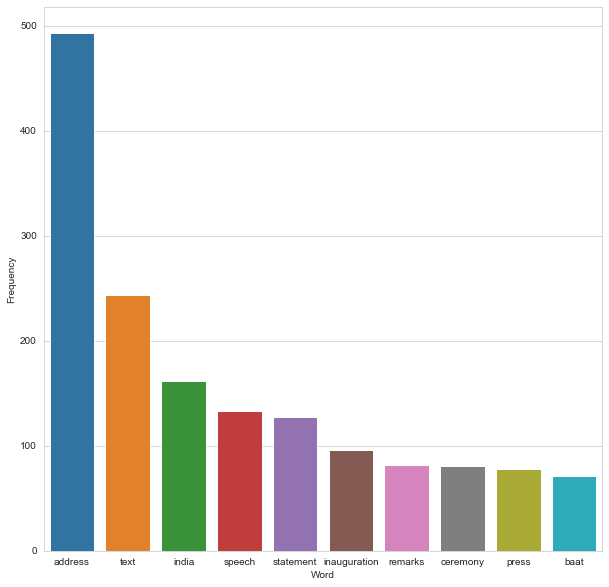

In [54]:
#Title Analysis

top_Num = 200

a = df['title'].str.lower().str.cat(sep=' ')

# removes punctuation
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = get_stop_words('en')        
nltk_words = stopwords.words('english')   
stop_words.extend(nltk_words)


word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        


word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_Num),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

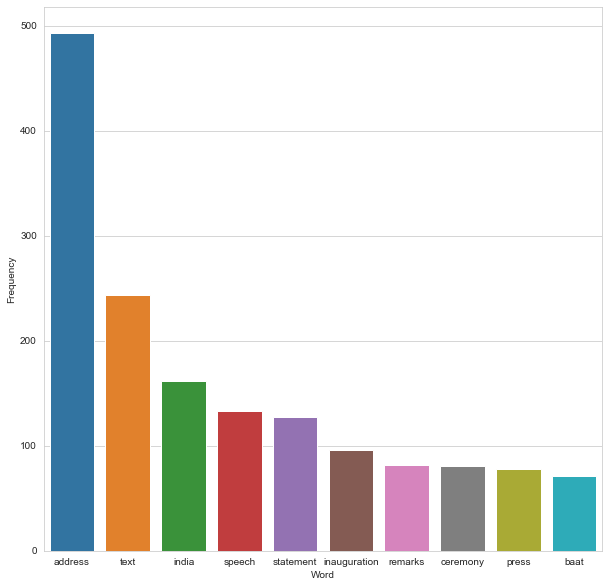

In [55]:
#Text Analysis

top_Num1 = 150

a1 = df['text'].str.lower().str.cat(sep=' ')

# removes punctuation
b1 = re.sub('[^A-Za-z]+', ' ', a1)

#remove all the stopwords from the text
stop_words1 = get_stop_words('en')        
nltk_words1 = stopwords.words('english')   
stop_words1.extend(nltk_words)


word_tokens1 = word_tokenize(b1)
filtered_sentence1 = [w for w in word_tokens1 if not w in stop_words1]
filtered_sentence1 = []
for w in word_tokens1:
    if w not in stop_words1:
        filtered_sentence1.append(w)

without_single_chr1 = [word for word in filtered_sentence1 if len(word) > 2]

# Remove numbers
cleaned_data_title1 = [word for word in without_single_chr1 if not word.isnumeric()]        


word_dist1 = nltk.FreqDist(cleaned_data_title1)
rslt1 = pd.DataFrame(word_dist1.most_common(top_Num1),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

## Past 50 Speeches

In [56]:
df_50 = df.head(50)
df_50.head()

,date,title,text
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,"My dear countrymen, Namaskar.\nGenerally, this..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,Our country’s Agriculture Minister Shri Narend...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,"My cabinet colleague, Shri Rajnath ji, Chief o..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,"My dear countrymen,\nCongratulations and many ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,The process of Structural Reforms going on in ...


In [57]:
l1 = df_50['text']

series = pd.Series(l1) 

economy_Count = series.str.count("economy")
Economy_Count = series.str.count("Economy")

In [58]:
economy_Count.aggregate(sum)

49

In [59]:
Economy_Count.aggregate(sum)

6

In [60]:
economy_Count = pd.concat([df_50['date'], economy_Count], axis = 1)
economy_Count.head(10)

,date,text
0,"Aug 30, 2020",1
1,"Aug 29, 2020",1
2,"Aug 27, 2020",1
3,"Aug 15, 2020",5
4,"Aug 13, 2020",0
5,"Aug 11, 2020",0
6,"Aug 10, 2020",1
7,"Aug 09, 2020",2
8,"Aug 08, 2020",0
9,"Aug 07, 2020",0


In [61]:
economy_Count = economy_Count.set_index("date")
economy_Count.head(5)

,text
date,
"Aug 30, 2020",1
"Aug 29, 2020",1
"Aug 27, 2020",1
"Aug 15, 2020",5
"Aug 13, 2020",0


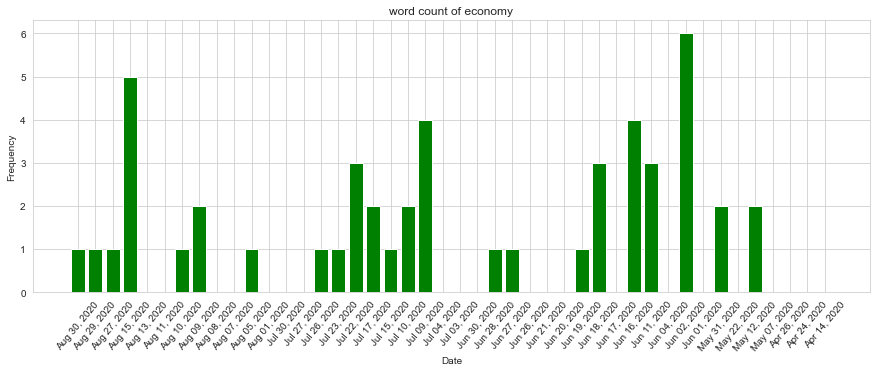

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(economy_Count.index.values,
        economy_Count['text'],
        color='Green')

# Set title 
ax.set(xlabel="Date",
       ylabel="Frequency",
       title="word count of economy")

plt.setp(ax.get_xticklabels(), rotation=50)

plt.show()

In [63]:
Economy_Count = pd.concat([df_50['date'], Economy_Count], axis = 1)
Economy_Count.head(10)

,date,text
0,"Aug 30, 2020",0
1,"Aug 29, 2020",0
2,"Aug 27, 2020",0
3,"Aug 15, 2020",0
4,"Aug 13, 2020",0
5,"Aug 11, 2020",0
6,"Aug 10, 2020",1
7,"Aug 09, 2020",0
8,"Aug 08, 2020",0
9,"Aug 07, 2020",0


In [64]:
Economy_Count = Economy_Count.set_index("date")
Economy_Count.head(5)

,text
date,
"Aug 30, 2020",0
"Aug 29, 2020",0
"Aug 27, 2020",0
"Aug 15, 2020",0
"Aug 13, 2020",0


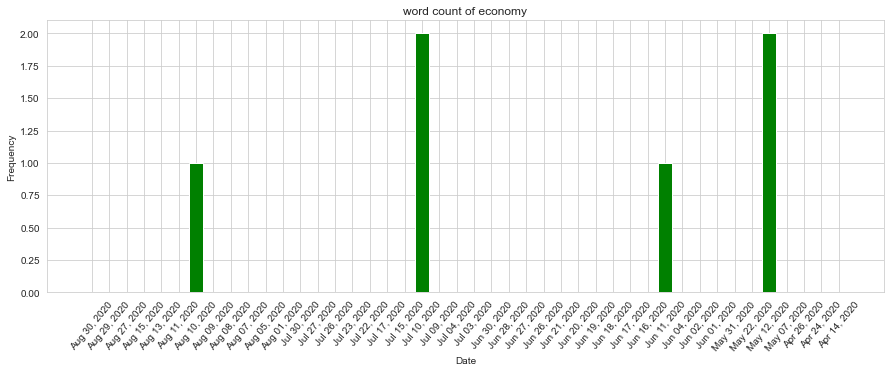

In [66]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(Economy_Count.index.values,
        Economy_Count['text'],
        color='Green')

# Set title 
ax.set(xlabel="Date",
       ylabel="Frequency",
       title="word count of economy")

plt.setp(ax.get_xticklabels(), rotation=50)

plt.show()